In [103]:
# HI There, Just relax and enjoy the show :)

# Your task in this challenge is to predict the cost of the houses in particular blocks 
# based on different sociodemographic attributes 
# (It's up to you to decide which attributes you want to use, you can include location information or not)

# You can use any of the libraries that you want
# These libraries below are just a recommendation


# CHALLENGE 1: If some of those libraries are  not available on your system,
# you would need to resolve the dependencies as part of this challenge

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import math

%matplotlib inline

In [28]:
# We will work with this dataset in the next steps
# CHALLENGE 2: Load the data ( it will get harder :) )
df = fetch_california_housing(as_frame=True)["frame"]
df.head(10)

# ---- Attribute Information ----:
# MedInc:  median income in block
# HouseAge:  median house age in block
# AveRooms:  average number of rooms
# AveBedrms:  average number of bedrooms
# Population:  block population
# AveOccup:  average house occupancy
# Latitude:  house block latitude
# Longitude:  house block longitude
# MedHouseVal: the median house value for California districts (!! our target variable !!)

# This dataset was derived from the 1990 U.S. census, using one row per census
# block group. A block group is the smallest geographical unit for which the U.S.
# Census Bureau publishes sample data (a block group typically has a population
# of 600 to 3,000 people).


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [29]:
# CHALLENGE 3: Explorative Data Analysis and Data Cleaning
# Examine the data for outliers, missing values and try to apply some
# cleaning on the data. Provide visualization if possible
# Do you see any patterns, correlations in the data?
# Please describe your observations

# Data Cleaning in order to remove the possible blank rows and missing values
#For this we imported pandas and use dropna function as follows:
df.dropna(axis = 0, inplace = True)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


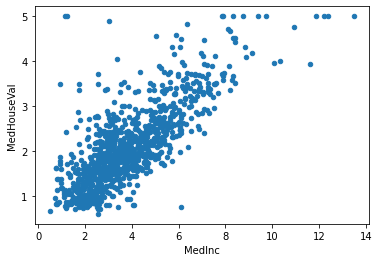

In [46]:
# Do you see any patterns, correlations in the data?
# Please describe your observations

# First observation:
# We can see that people with higher median income in block live in places with higher median house value for California districts
# This means that the median income in block is in proportional relationship with median house value for California districts
# In the following, we deploy the scatter plot for the first 1000 rows of the two columns MedInc and MedHouseVal 

df.head(1000).plot(x = "MedInc", y = "MedHouseVal", kind = "scatter")
plt.show()

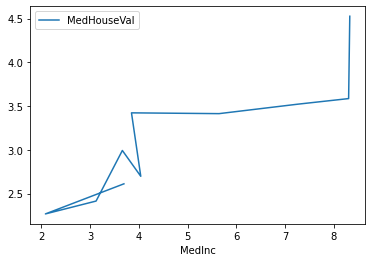

In [45]:
# In the following, we deploy the linear plot for the first 10 rows of the two columns MedInc and MedHouseVal 

df.head(10).plot(x = "MedInc", y = "MedHouseVal", kind = "line")
plt.show()

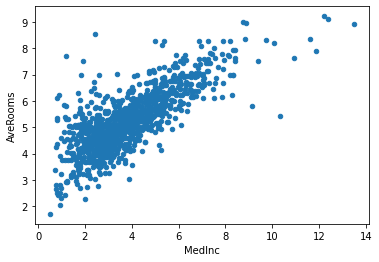

In [44]:
# Second observation:
# Secondly, the higher the median income in block, the higher the average number of rooms
# As the last part, we can observe that the these two attributes are in proportional relationship with each other
# Here, we again do the scatter plot for the first 1000 rows of the columns MedInc and AveRooms

df.head(1000).plot(x = "MedInc", y = "AveRooms", kind = "scatter")
plt.show()

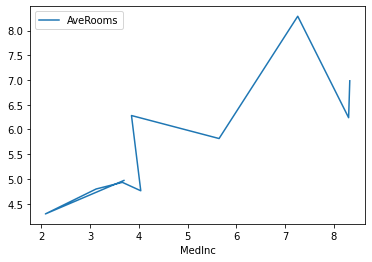

In [43]:
# In the following, we deploy the linear plot for the first 10 rows of the two columns MedInc and AveRooms 

df.head(10).plot(x = "MedInc", y = "AveRooms", kind = "line")
plt.show()

In [48]:
# In order to measure the relationships between all pairs of attributes, one can utilize the correlation coefficient
# which ranges from -1 to 1 and in particular, the equality to zero means there is no relationship
# To observe all of the correlation coefficients altogether on a table, we make use of corr() function to construct
# the correspondence correlation matrix

# In order to round the output to two decimals, we use the round function
Corr_mat = round(df.corr(),2)
print(Corr_mat)
    
# For instance, our previous observation regarding the relationship between MedInc and MedHouseVal can be read off
# from the following table, where the correspondence value is 0.69 and since it is close to 1, we can say that there is a 
# (relatively perfect) linear relationship beween them.
# On the other hand, we can see that the relationship (correlation coefficient) between Longitude and Latitude is -0.92,
# which is close to -1 and therefore, there is a perfect negative linear relationship between them

             MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc         1.00     -0.12      0.33      -0.06        0.00      0.02   
HouseAge      -0.12      1.00     -0.15      -0.08       -0.30      0.01   
AveRooms       0.33     -0.15      1.00       0.85       -0.07     -0.00   
AveBedrms     -0.06     -0.08      0.85       1.00       -0.07     -0.01   
Population     0.00     -0.30     -0.07      -0.07        1.00      0.07   
AveOccup       0.02      0.01     -0.00      -0.01        0.07      1.00   
Latitude      -0.08      0.01      0.11       0.07       -0.11      0.00   
Longitude     -0.02     -0.11     -0.03       0.01        0.10      0.00   
MedHouseVal    0.69      0.11      0.15      -0.05       -0.02     -0.02   

             Latitude  Longitude  MedHouseVal  
MedInc          -0.08      -0.02         0.69  
HouseAge         0.01      -0.11         0.11  
AveRooms         0.11      -0.03         0.15  
AveBedrms        0.07       0.01        -0.05  

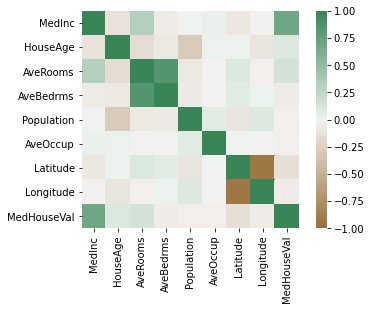

In [97]:
# To visualize all possible correlations between pairwise attributes given in the above table, one can use the heatmap 
# For this, we use heatmap() from the seaborn library

# vmin and vmax stand for the maximum and minimum of the correlation coefficient and set to be -1 and 1, respectively.
# the center is set to be 0 (no relationship)
# we can define the colors with sns.diverging_palette and n=500 states that we want 500 types of color 
# in the same color palette
Corr_df = df.corr()
axis_corr = sns.heatmap(Corr_df, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(50, 500, n=500),square=True)
plt.show()

# As mentioned earlier, the correlation coefficient ranges over the interval [-1, 1] and in the following visualization, 
# the closer the correlation coefficient is to 1, the darker greener the squares get and closer the correlation coefficient is 
# to -1, the darker browner the squares get.

In [99]:
# CHALLENGE 4: Now divide your dataset into train- and testset and apply any models you want
# (you can use any frameworks you want e.g sklearn, tensorflow etc)

# First, the dataset(df) must be split into input and output components
data = df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)


(20640, 8) (20640,)


In [106]:
# Now, we split the dataset using 80% for training and 20% for testing
# We split dataset into train test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Our dataset is split into train and test sets and it can be observed that there are 16512 rows for training 
# and 4128 rows for the test set.

(16512, 8) (4128, 8) (16512,) (4128,)


In [110]:
# We now define and fit the model on the training dataset
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [111]:
# We are using the mean absolute error (MAE) performance metric to evaluate the predictions

yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.4f' % mae)

# As a result, the MAE is approximately 0.33 when evaluating on the test set and making performance predictions 

MAE: 0.3264


In [112]:
# CHALLENGE 5: Measure the results of your models and apply model selection
# Please argue why would you select one model over another

# Another possible metric would be root mean squared error (rmse) which is the square root of the 
# average of squared differences between prediction and actual observation.
# For instance in our case, since the mae is less than 1 and consequently, its square root will derive a 
# larger number than the initial number (mae~0.32) as we see in the following:
rmse = math.sqrt(0.3264)
print(rmse)
# We conclude that mae < rmse and so, our metric mae is a better fitting model for our purpose.

0.5713142742834281


In [113]:
# CHALLENNGE 6: Write a summary report of your results, including plots and 
#discussion of your results (You can reuse the outcome/plots from above). 
#The report shall cover the following questions:
# 1. What was most interesting/surprising for you when you explored and visualized the data?
# 2. What was the biggest problem for you to complete all challenges, and how did you solve the problem?
# 3. Which model performed best, and why?
# 4. ...


# 1. The most interesting aspect was observing the correlations between different sociodemographic attributes; for instance, 
# our correlation matrix table illustrates that there is absolutely no correlation between population and median income in block, 
# which I was not aware of. The latter means the population size is completely independent of the median income 
# and vice versa.

# 2. One of the main challenges I faced was identifying which model to implement for the fetch_california_housing dataset
# and I overcame it by looking at and searching for different models.

# 3. The other model that we can use is possible by utilizing the RandomForestClassifier from sklearn.ensemble. By measuring 
# performancy of the models, it can be realized that our model is one of the best model wich has a very low mae.